<div style="text-align: center; color: #F5B7B1;">

# **Concrete Slump**

</div>

<div style="float: left; border: 2px solid white; padding: 10px; width: 250px;">

### <u> Group Members:</u>
- Laiba Bint-e-Zia [23K-0006]
- Alisha Zaidi [23K-0025]

</div>

## Description Of Data Set:

<div style="margin-left: 20px;">

1. The data set is of concrete slump.  
2. It contains 103 rows and 10 columns  
3. Each row represents a different concrete mixture and slump test result.
4. The columns include inputs like cement amount, water, fine and coarse aggregates, and outputs like compressive strength and slump values.

</div>


## Project Overview
<div style="margin-left: 20px;">

The primary goal is to clean and prepare the data, perform exploratory data analysis (EDA) to uncover insights, 
and apply a machine learning algorithm to predict the compressive strength of concrete based on its properties. 
Additionally, a user-friendly interface will be developed to allow interaction with the dataset, visualizations, and model predictions.

Through this project, we aim to:

- Understand the relationships between key variables in the dataset.
- Identify trends, patterns, and potential anomalies through statistical analysis and data visualizations.
- Build a predictive model using regression to forecast the compressive strength.
- Provide an accessible user interface for future use of the dataset and model.
- This project integrates Python libraries like Pandas, Matplotlib, Seaborn,
- and Scikit-learn, leveraging their capabilities for data manipulation, visualization, and machine learning.

</div>

#### 1- Loading the modules to be used

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### 2- Loading data set

In [69]:
df = pd.read_csv("cement_slump.csv")

#### 3- Checking for components to clean them

In [70]:
print("The total number of null values in columns are:")
pd.isnull(df).sum()

The total number of null values in columns are:


Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [71]:
print("duplicated rows: ")
int(df.duplicated().sum())


duplicated rows: 


0

In [72]:
print("Invalid data: ")
neg_values = df[(df <= 0).any(axis=1)]

neg_values

Invalid data: 


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
1,163.00,149.00,191.00,180.00,12.00,843.00,746.00,0.00,20.00,41.14
6,152.00,139.00,178.00,168.00,18.00,944.00,695.00,0.00,20.00,38.86
7,145.00,0.00,227.00,240.00,6.00,750.00,853.00,14.50,58.50,36.59
8,152.00,0.00,237.00,204.00,6.00,785.00,892.00,15.50,51.00,32.71
9,304.00,0.00,140.00,214.00,6.00,895.00,722.00,19.00,51.00,38.46
13,354.00,0.00,0.00,234.00,6.00,959.00,691.00,17.00,54.00,33.91
14,374.00,0.00,0.00,190.00,7.00,1013.00,730.00,14.50,42.50,32.44
16,153.00,0.00,239.00,200.00,6.00,1002.00,684.00,12.00,35.00,28.29
18,310.00,0.00,143.00,168.00,10.00,914.00,804.00,20.50,48.20,49.30
19,296.00,97.00,0.00,219.00,9.00,932.00,685.00,15.00,48.50,29.23


In [73]:
print("Any string values or columns having string data type: ")

cols_with_string = df.select_dtypes(include=['object', 'string'])
row_with_strings = df[df.map(lambda x: isinstance(x, str)).any(axis=1)]

cols_with_string
row_with_strings

Any string values or columns having string data type: 


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)


In [74]:
print("Data Types of all columns: ")
df.dtypes

Data Types of all columns: 


Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

In [75]:
print(df.mean())
print(df.std())

#The Data set has different ranges and magnitudes (e.g., "Cement" has values in the hundreds, while "SP" and "Water" are much smaller). This suggests that the variables are on different scalest

Cement                               229.89
Slag                                  77.97
Fly ash                              149.01
Water                                197.17
SP                                     8.54
Coarse Aggr.                         883.98
Fine Aggr.                           739.60
SLUMP(cm)                             18.05
FLOW(cm)                              49.61
Compressive Strength (28-day)(Mpa)    36.04
dtype: float64
Cement                               78.88
Slag                                 60.46
Fly ash                              85.42
Water                                20.21
SP                                    2.81
Coarse Aggr.                         88.39
Fine Aggr.                           63.34
SLUMP(cm)                             8.75
FLOW(cm)                             17.57
Compressive Strength (28-day)(Mpa)    7.84
dtype: float64


In [76]:
# will use z-score to determine the outliers
# Z score: The Z-score indicates how many standard deviations a data point is from the mean. Data points with a Z-score greater than a threshold (commonly 3 or -3) are considered outliers.
z_scores = np.abs(zscore(df))
# Setting a threshold (commonly 3)
outliers = (z_scores > 3)

print("Outliers in the dataset:")
df[outliers.any(axis=1)]

Outliers in the dataset:


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
3,162.00,148.00,190.00,179.00,19.00,838.00,741.00,3.00,21.50,42.08
6,152.00,139.00,178.00,168.00,18.00,944.00,695.00,0.00,20.00,38.86


##### The aspects we've seen so far will address some important components of data cleaning, but they don't cover the full scope. For example, we haven't yet considered null values, duplicate rows, or string columns. To demonstrate a comprehensive approach to data cleaning, we will convert a column to string, add duplicated values, and introduce null and negative values. This way, we can address every type of data cleaning issue and provide a thorough example.

#### 4- Including null, neg values, duplicated rows, etc.

In [77]:
# adding null values

# Specify the proportion of NaN values to be added (e.g., 20%)
nan_percentage = 0.2

# Calculate the total number of values in the DataFrame
total_values = df.size

# Determine how many values should be NaN
num_nulls = int(nan_percentage * total_values)

# Randomly select indices where NaN values will be inserted
random_indices = np.random.choice(df.index, size=num_nulls, replace=True)

# Randomly select columns
random_columns = np.random.choice(df.columns, size=num_nulls, replace=True)

# Insert NaN values at the selected positions
for i in range(num_nulls):
    df.loc[random_indices[i], random_columns[i]] = np.nan

print("Null values: ")
pd.isnull(df).sum()

Null values: 


Cement                                18
Slag                                  16
Fly ash                               16
Water                                 18
SP                                    16
Coarse Aggr.                          25
Fine Aggr.                            25
SLUMP(cm)                             15
FLOW(cm)                              21
Compressive Strength (28-day)(Mpa)    15
dtype: int64

In [78]:
# Adding duplicated values

# Specify the number of duplicate rows you want to add
num_duplicates = 8

# Randomly select rows to duplicate
duplicated_rows = df.sample(n=num_duplicates, replace=True)

# Append the duplicate rows to the original DataFrame
df = pd.concat([df, duplicated_rows], ignore_index=True)

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
106     True
107     True
108     True
109     True
110     True
Length: 111, dtype: bool

In [79]:
# Adding neg values

# Specify how many cells you want to change to negative
num_neg_values = 9

# Randomly select row and column indices
rows = np.random.choice(df.index, num_neg_values, replace=True)  # Randomly select rows
cols = np.random.choice(df.columns, num_neg_values, replace=True)  # Randomly select columns

# Set the selected values to negative
for row, col in zip(rows, cols):
    df.at[row, col] = -abs(df.at[row, col])  # Ensure it's a negative value

neg_values = df[(df < 0).any(axis=1)]
neg_values

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
23,146.00,178.00,0.00,192.00,11.00,961.00,749.00,-18.00,46.00,17.19
35,275.00,99.00,-127.00,184.00,13.00,NaN,790.00,25.75,64.50,NaN
36,252.00,76.00,97.00,194.00,8.00,835.00,-821.00,23.00,54.00,33.11
55,159.00,193.00,0.00,208.00,12.00,821.00,818.00,23.00,-50.00,19.19
58,143.00,-131.00,168.00,NaN,NaN,891.00,672.00,25.00,NaN,26.42
87,NaN,0.30,240.00,234.20,-8.90,780.60,811.30,26.50,78.00,NaN
107,-265.00,86.00,111.00,195.00,6.00,833.00,NaN,27.00,60.00,37.39


In [80]:
#changing col to string 
df['SP'] = df['SP'].astype(str)

df.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                     object
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

#### Now we will cover most of the cleaning techniques.

#### 5- dropping duplicates

In [81]:
df.drop_duplicates(inplace=True)
int(df.duplicated().sum())

print("Duplicates Removed")

Duplicates Removed


#### 6-String to Float Conversion

In [82]:
string_columns = df.select_dtypes(include=['object']).columns

# Convert string columns to float
for col in string_columns:
    df[col] = df[col].astype(float)

df.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

#### 7- Filling in null values

In [83]:
#filing missing values with their respective cols means
df.fillna(df.mean(), inplace=True)

print("The total number of null values in columns are:")
pd.isnull(df).sum()

The total number of null values in columns are:


Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

#### 8-Filling values in place of 0 or neg values

In [84]:
df = df.apply(lambda x: x.mask((x <= 0), x.mean()), axis=0)

neg_values = df[(df < 0).any(axis=1)]
neg_values

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)


#### 9- Removing Outliers

In [85]:
z_scores = np.abs(zscore(df))

# Set a threshold for Z-score
threshold = 3

# Remove rows where any Z-score is greater than the threshold
df_cleaned = df[(z_scores < threshold).all(axis=1)]

# Identify rows with Z-scores greater than threshold (outliers)
outliers = (z_scores > threshold)

# Show the rows that are outliers
outlier_rows = df[outliers.any(axis=1)]

#### 10- Scaling Data

In [86]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Data Standarized!")

Data Standarized!


### We have now cleaned our data, Now it's time to perform numerical analysis on it.

#### 11- Information about data set

In [87]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              104 non-null    float64
 1   Slag                                104 non-null    float64
 2   Fly ash                             104 non-null    float64
 3   Water                               104 non-null    float64
 4   SP                                  104 non-null    float64
 5   Coarse Aggr.                        104 non-null    float64
 6   Fine Aggr.                          104 non-null    float64
 7   SLUMP(cm)                           104 non-null    float64
 8   FLOW(cm)                            104 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  104 non-null    float64
dtypes: float64(10)
memory usage: 8.9 KB


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.00
mean,228.68,87.11,176.51,196.22,8.53,882.36,732.43,19.99,48.07,35.61
std,70.75,38.89,45.47,18.25,2.51,76.94,53.29,5.69,15.99,6.92
min,137.00,0.10,97.00,160.00,4.60,708.00,640.60,1.00,20.00,17.19
25%,155.85,68.68,150.66,182.75,6.00,839.50,709.08,18.08,42.25,31.47
50%,223.98,68.68,150.66,196.22,8.36,882.36,717.64,20.75,47.13,35.61
75%,295.07,109.25,235.43,206.25,10.00,908.23,765.25,24.00,60.25,39.53
max,374.00,193.00,260.00,237.00,19.00,1049.90,902.00,29.00,78.00,52.65


#### 12- Numerical Analysis

In [88]:
# Mean
mean_values = df.mean()

# Median
median_values = df.median()

# Mode
mode_values = df.mode().iloc[0]  # For mode, we take the first mode (there can be multiple modes)

# Standard Deviation
std_deviation_values = df.std()

# Variance
variance_values = df.var()

# Minimum
min_values = df.min()

# Maximum
max_values = df.max()

# Print the results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_deviation_values)
print("\nVariance:\n", variance_values)
print("\nMinimum:\n", min_values)
print("\nMaximum:\n", max_values)

Mean:
 Cement                               228.68
Slag                                  87.11
Fly ash                              176.51
Water                                196.22
SP                                     8.53
Coarse Aggr.                         882.36
Fine Aggr.                           732.43
SLUMP(cm)                             19.99
FLOW(cm)                              48.07
Compressive Strength (28-day)(Mpa)    35.61
dtype: float64

Median:
 Cement                               223.98
Slag                                  68.68
Fly ash                              150.66
Water                                196.22
SP                                     8.36
Coarse Aggr.                         882.36
Fine Aggr.                           717.64
SLUMP(cm)                             20.75
FLOW(cm)                              47.13
Compressive Strength (28-day)(Mpa)    35.61
dtype: float64

Mode:
 Cement                               223.98
Slag                 

In [89]:
#Co Relation Matrix

# Adjust display settings
pd.set_option('display.width', 1000)  # Adjust width of the display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                     Cement  Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)
Cement                                1.00 -0.16    -0.38   0.17 -0.15         -0.26        0.04       0.10      0.24                                0.39
Slag                                 -0.16  1.00    -0.17  -0.13  0.29         -0.20       -0.07      -0.30     -0.39                               -0.14
Fly ash                              -0.38 -0.17     1.00  -0.18 -0.12          0.25       -0.28      -0.09     -0.14                                0.20
Water                                 0.17 -0.13    -0.18   1.00 -0.11         -0.46        0.02       0.30      0.58                               -0.24
SP                                   -0.15  0.29    -0.12  -0.11  1.00          0.08        0.05      -0.07     -0.20                               -0.11
Coarse Aggr.                         -0.26 -0.20     0

## Visualization Of Data

In [90]:
# Set a dark grid theme
sns.set_theme(style="darkgrid", palette="muted", rc={"axes.facecolor": "#2b2b2b", "grid.color": "#444444"})

# Customizing Matplotlib parameters
plt.rcParams.update({
    'axes.edgecolor': '#ffffff',  # White borders for axes
    'axes.labelcolor': '#ffffff',  # White labels
    'xtick.color': '#ffffff',  # White x-ticks
    'ytick.color': '#ffffff',  # White y-ticks
    'figure.facecolor': '#1e1e1e',  # Dark background for figures
    'grid.alpha': 0.5,  # Subtle gridlines
    'text.color': '#ffffff',  # White text
    'axes.titleweight': 'bold',
    'axes.titlecolor': '#ffffff'
})

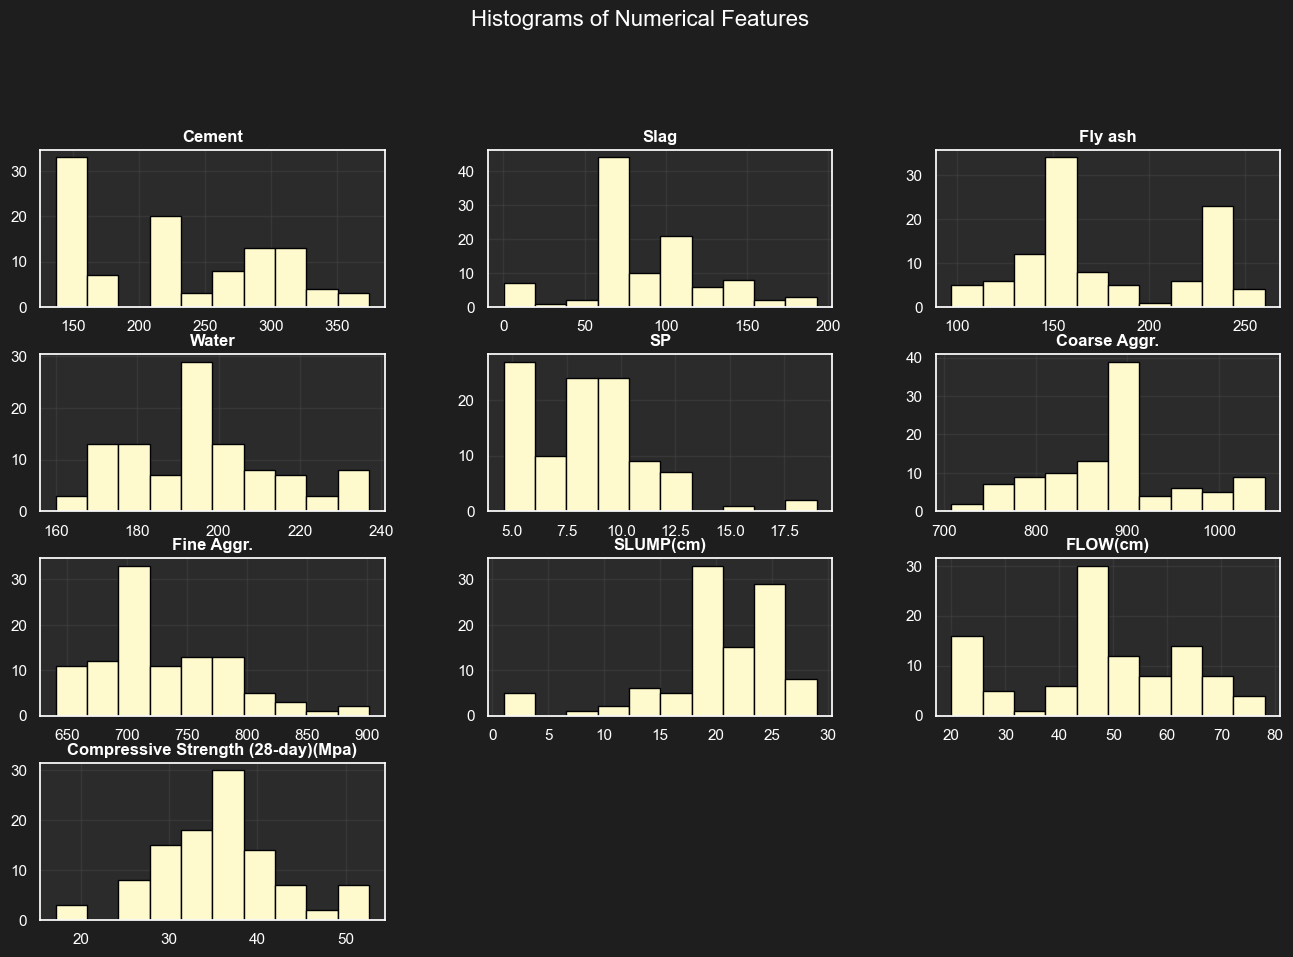

In [91]:
# Histogram for all numerical columns
df.hist(bins=10, figsize=(16, 10), color='#FFFACD', edgecolor='black')  # Light blue bars
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()

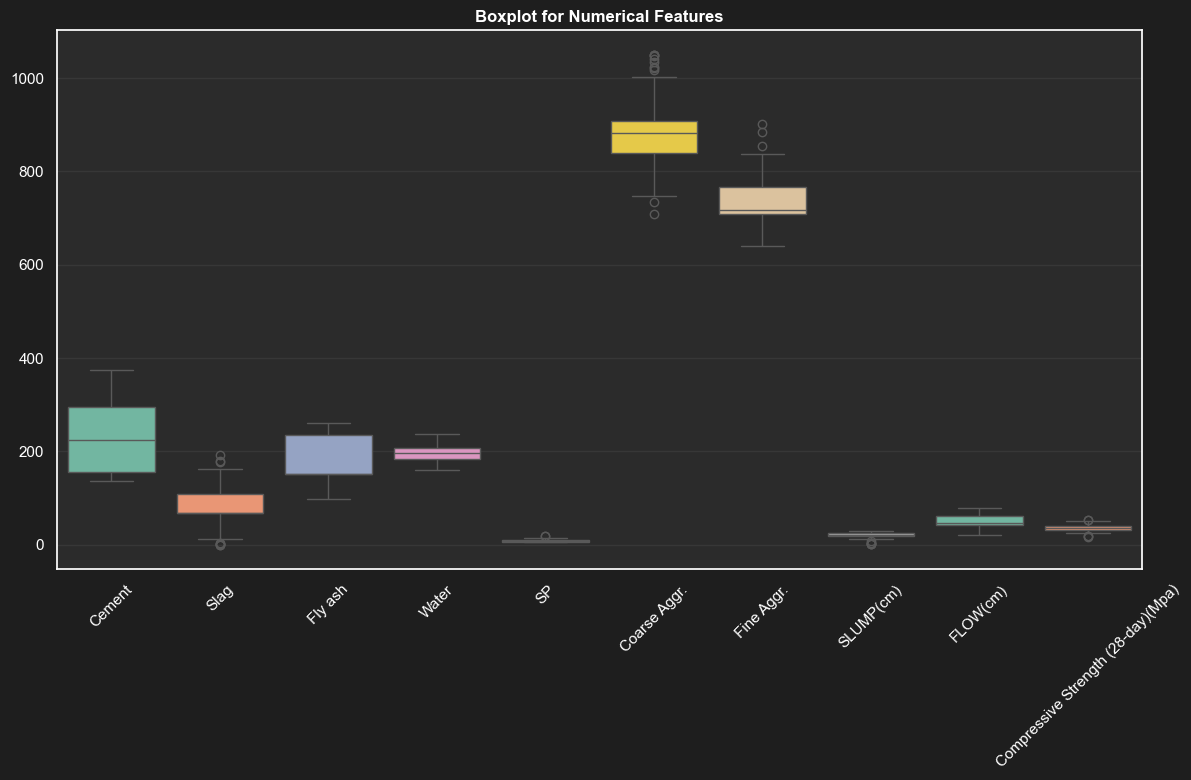

In [92]:
# Boxplot for numerical features
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, palette="Set2")  # Pastel color palette
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

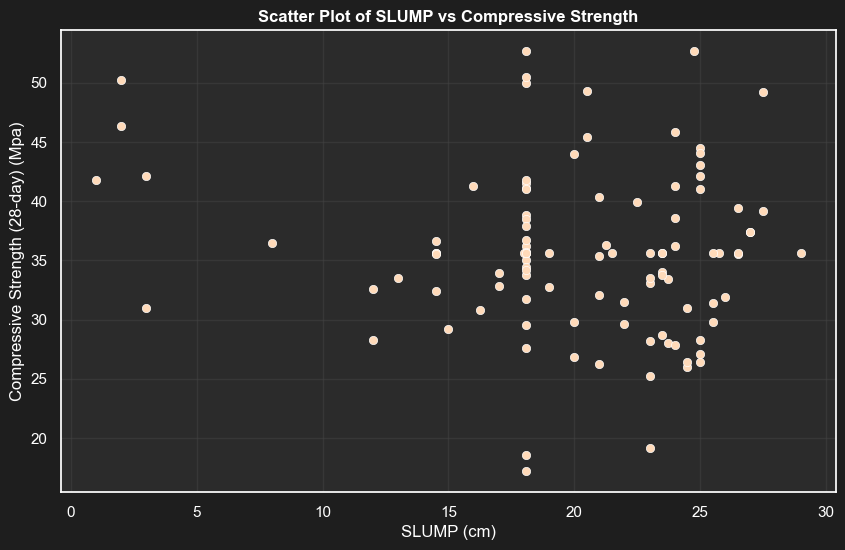

In [93]:
# Scatter plot for SLUMP vs Compressive Strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SLUMP(cm)', y='Compressive Strength (28-day)(Mpa)', data=df, color='#FFDAB9', edgecolor='white')  # Coral dots
plt.title('Scatter Plot of SLUMP vs Compressive Strength')
plt.xlabel('SLUMP (cm)')
plt.ylabel('Compressive Strength (28-day) (Mpa)')
plt.show()

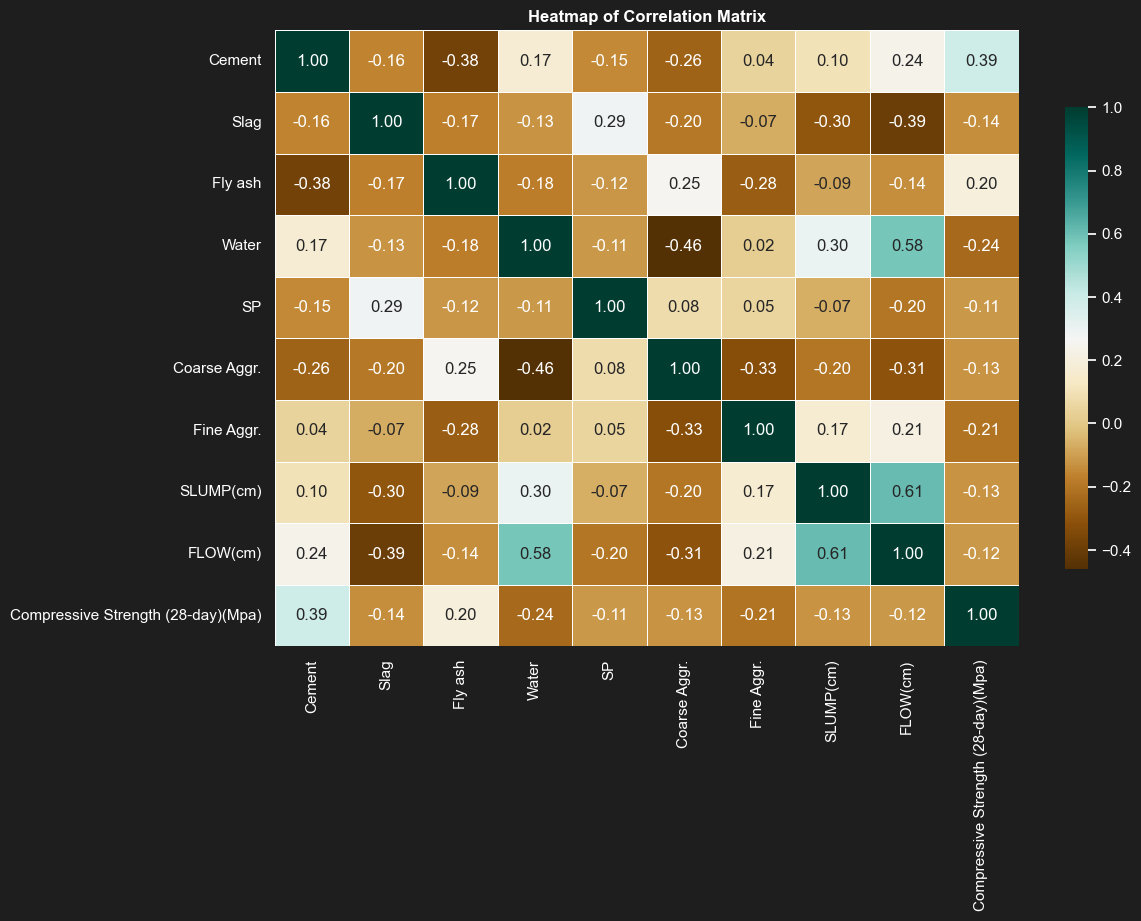

In [94]:
# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Heatmap of Correlation Matrix')
plt.show()

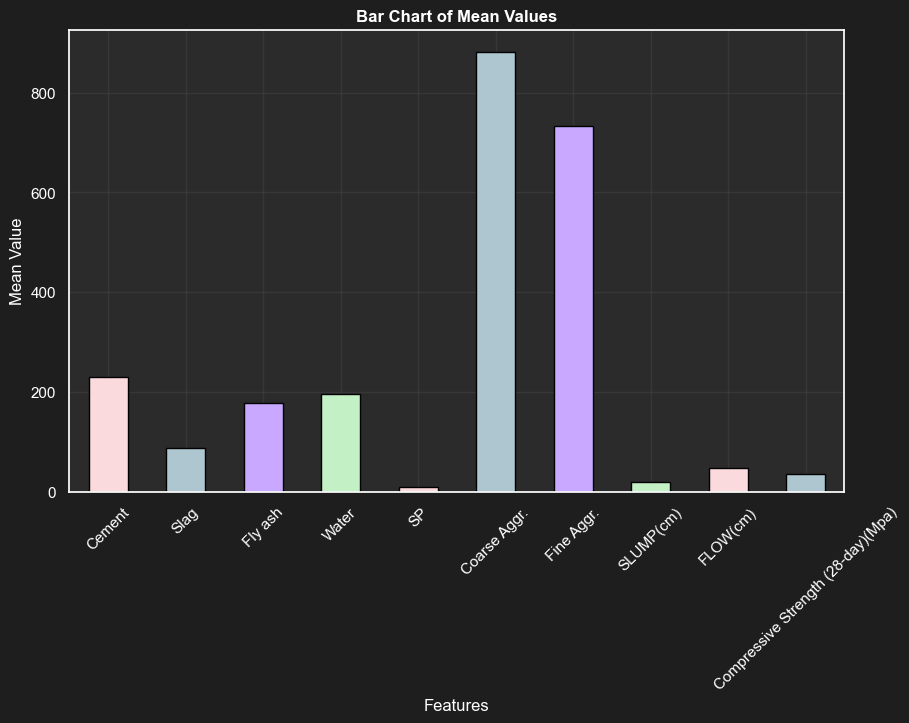

In [95]:
# Bar chart for mean values
mean_values = df.mean()
mean_values.plot(kind='bar', color=['#FADADD', '#AEC6CF', '#C9A9FF', '#C4F0C5'], edgecolor='black', figsize=(10, 6))
plt.title('Bar Chart of Mean Values')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

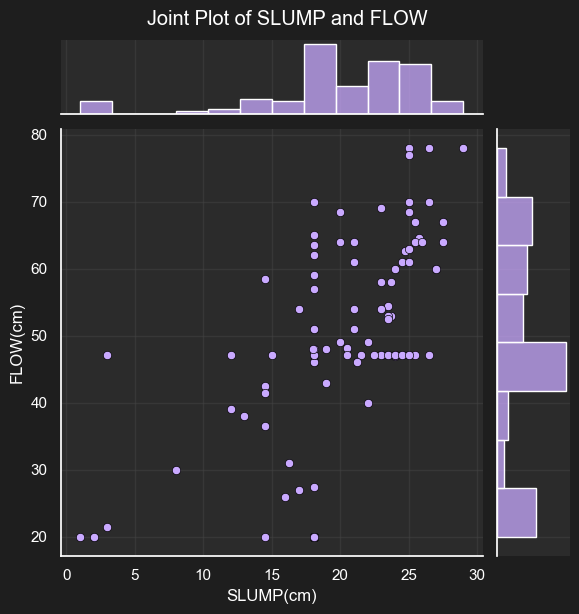

In [96]:
# Joint plot for SLUMP and FLOW
sns.jointplot(x='SLUMP(cm)', y='FLOW(cm)', data=df, kind='scatter', edgecolor='black', color="#C9A9FF")  # Magma colormap
plt.suptitle('Joint Plot of SLUMP and FLOW', y=1.02)
plt.show()

## 15- Linear Regression Model

#### Linear regression is a statistical method used to model and analyze the relationship between one or more independent variables (also called predictors or features) and a dependent variable (the outcome or target). It aims to find the best-fitting linear equation that represents this relationship.

##### separating/identifying predictors(x value) and respone(y value)

In [97]:
x = df.drop('SLUMP(cm)', axis=1)
y = df['SLUMP(cm)']

##### Divide the dataset into training and testing sets to evaluate the model

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Use scikit-learn to fit the linear regression model.

In [99]:
import pickle
model = LinearRegression()
model.fit(X_train, Y_train)

with open("concrete_slump_model.pkl", "wb") as f:
    pickle.dump(model, f)

##### Assess the performance using metrics like R-squared, Mean Squared Error (MSE)

In [100]:
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 20.677934290095894
R-squared: -0.8542876478601911


##### Examine the model's coefficients to understand the importance of each feature.

In [101]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.0059153  -0.02905182 -0.01135127 -0.03158878  0.2689299  -0.00756038
  0.00079781  0.24058187 -0.09644674]
Intercept: 27.35662463251295


##### visualize

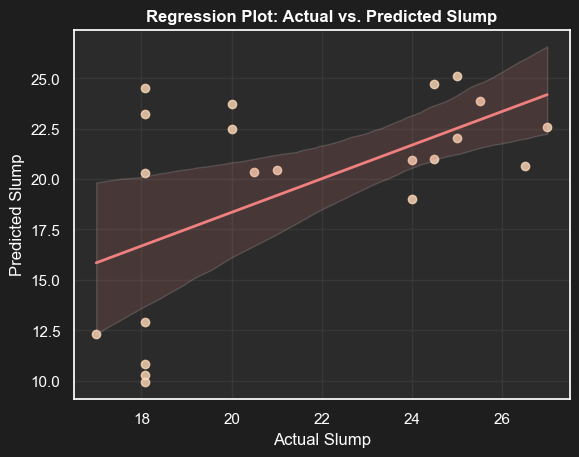

In [102]:
sns.regplot(
    x=Y_test, 
    y=y_pred, 
    scatter_kws={"color": "peachpuff"},  # Customize scatter points
    line_kws={"color": "lightcoral", "linewidth": 2}  # Customize regression line
)

plt.xlabel("Actual Slump")
plt.ylabel("Predicted Slump")
plt.title("Regression Plot: Actual vs. Predicted Slump")
plt.show()